In [1]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period="max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-27 00:00:00-04:00,6150.700195,6187.680176,6132.350098,6173.069824,7889350000,0.0,0.0
2025-06-30 00:00:00-04:00,6193.359863,6215.080078,6174.970215,6204.950195,5782900000,0.0,0.0
2025-07-01 00:00:00-04:00,6187.250000,6210.779785,6177.970215,6198.009766,6275310000,0.0,0.0


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-06-20 00:00:00-04:00', '2025-06-23 00:00:00-04:00',
               '2025-06-24 00:00:00-04:00', '2025-06-25 00:00:00-04:00',
               '2025-06-26 00:00:00-04:00', '2025-06-27 00:00:00-04:00',
               '2025-06-30 00:00:00-04:00', '2025-07-01 00:00:00-04:00',
               '2025-07-02 00:00:00-04:00', '2025-07-03 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24492, freq=None)

Now we have to clean and visualize our stock market data for the S&P 500. First we will plot the data points in a line graph where the y-axis will represent the closing price and the x-axis are the days.

<Axes: xlabel='Date'>

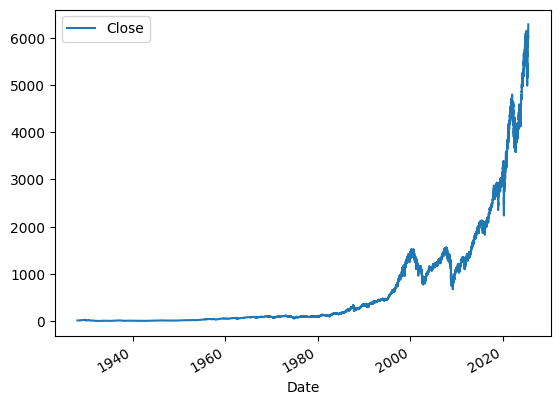

In [7]:
sp500.plot.line(y="Close", use_index=True)

Now we will set up our targets for machine learning! This is what we will be predicting: whether the price will go up or down. Specifically, we are looking to see the days where the stock does go up, can we accurately predict it going up?

We will create a tomorrow column that represents the next day's closing price.

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

Create a target column indicating whether or not tomorrow's price will be greater than today's closing price.

In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000,0
...,...,...,...,...,...,...,...,...,...
2025-06-27 00:00:00-04:00,6150.700195,6187.680176,6132.350098,6173.069824,7889350000,0.0,0.0,6204.950195,1
2025-06-30 00:00:00-04:00,6193.359863,6215.080078,6174.970215,6204.950195,5782900000,0.0,0.0,6198.009766,0
2025-07-01 00:00:00-04:00,6187.250000,6210.779785,6177.970215,6198.009766,6275310000,0.0,0.0,6227.419922,1


We will need to remove some data to remove some biases and extreme circumstances prior to 2000. To avoid removing too much, we will only remove data years before 1990.

In [10]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,0.0,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0.0,0.0,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0.0,0.0,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0.0,0.0,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0.0,0.0,349.619995,0
...,...,...,...,...,...,...,...,...,...
2025-06-27 00:00:00-04:00,6150.700195,6187.680176,6132.350098,6173.069824,7889350000,0.0,0.0,6204.950195,1
2025-06-30 00:00:00-04:00,6193.359863,6215.080078,6174.970215,6204.950195,5782900000,0.0,0.0,6198.009766,0
2025-07-01 00:00:00-04:00,6187.250000,6210.779785,6177.970215,6198.009766,6275310000,0.0,0.0,6227.419922,1


Now, we shall begin training our machine learning model! We will use a random forest model. This means we will have different random forests that will train on individual decision trees with randomized parameters. Then, it will average the results from the decision trees.

In [11]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators is the number of trees, min_samples is a insurance against overfitting, 
# random_state is a random seed
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Let's see how well our model is.

In [12]:
from sklearn.metrics import precision_score

# our precision score will be based off of a prediction using the predictors params
preds = model.predict(test[predictors])

In [13]:
# turn our precision score as a series instead for readibility
import pandas as pd

preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5662650602409639

58%? Not great. But don't worry, we will improve our model.

<Axes: xlabel='Date'>

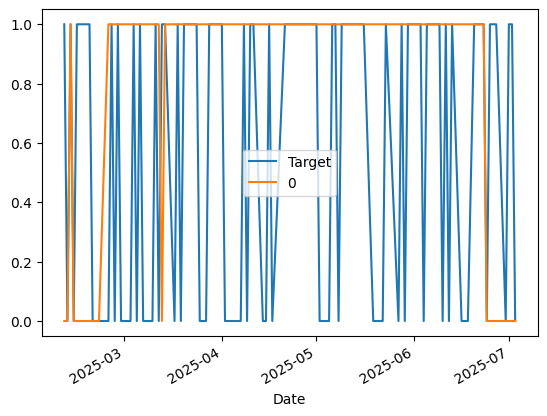

In [14]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In the graph above, we can see that our prediction (orange) and the actual stock price (blue), are completely off. So there's some improvement needed for our model to accurately predict the target.

Let's build a more robust way to test our algorithm. We will use a backtesting system over many various situations besides the 100 data points we have here.

In [15]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [16]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [17]:
predictions = backtest(sp500, model, predictors)
predictions["Predictions"].value_counts()
precision_score(predictions["Target"], predictions["Predictions"])

0.5298311444652908

Creating numerous rolling averages. Sees the closing prices between days and ration between today's closing price and the time period's closing price

In [25]:
horizons = [2,5,69,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_avg = sp500.rolling(horizon).mean()

    ratio_col = f"Close_Ratio{horizon}"
    sp500[ratio_col] = sp500["Close"] / rolling_avg["Close"]

    trend_col = f"Trend_{horizon}"
    sp500[trend_col] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_col, trend_col]

In [26]:
sp500 = sp500.dropna()

Lets update and try to improve our model.

In [27]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [28]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]  # Probability stock goes up or down
    preds[preds >= .6] = 1  # Reduce trading volume for increased accuracy
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [29]:
predictions = backtest(sp500, model, new_predictors)

In [31]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5263157894736842